 ```python
def train(learn, epochs, callbacks, matrics):
    cb_handler = CallbackHandler(callbacks)
    cn_handler.on_train_begin(epochs, learn, metrics)
    
    for epochs in range(epochs):
        learn.model.train()
        cb_handler.on_epoch_begin(epoch)
        
        for xb, yb in learn.data.train_dl:
            xb, yb = cb_handler.on_batch_begin(xb, yb)
            
            out = learn.model(xb)
            out = cb_handler.on_loss_begin(out)
            
            loss = learn.loss_fun(out, yb)
            loss, skip_backward = callbacks.on_loss_begin(loss)
            
            if not skip_backward: loss.bakward()
            if not cb_handler.on_step_begin(): learn.opt.step()
            if not cb_handler.on_step_end(): learn.opt.zero_grad()
            if not callbacks.on_batch_end(): break
        val_loss, mets = validate(learn.data.valid_dl, model, matrics)
        if not callbacks.on_epoch_end(val_loss, mets): break
    callbacks.on_train_end()
```
            

Add **callback** so that we could remove complexity from loop, and make it flexible.

```python
class GANModule(nn.Module):
    def __init__():
    def forward():
    def switch(self, gen_mode:bool = None):
        # put the model in generator mode if 'gen_mode', in critic mode otherwise.
        self.gen_mode = (not self.gen_mode) if gen_mode is None else gen_mode.
        
class GANloss(GANModule):
    def __init__():
    def genrator(self, output, target):
    def crtic(self, real_pred, input):
        fake = self.gan_model.generator(input.requires_grad_(False)).requires_grad_(True)
        fake_pred = self.gan_model.critic(fake)
        return self.loss_func(real_pred, fake_pred)
    
class GANTrainer(LearnerCallback):
    # handles GAN training
    _order = -20
    def __init__(self, learn:Learner, clip: float = None, gen_first: bool = false):
    def _set_trainable(self): 
    def switch(self, gen_mode: bool = None):
    def on_train_begin(self, **kwargs):
    def on_train_end(self, **kwargs):
    def on_batch_begin(self, ...):
        ...
    
```

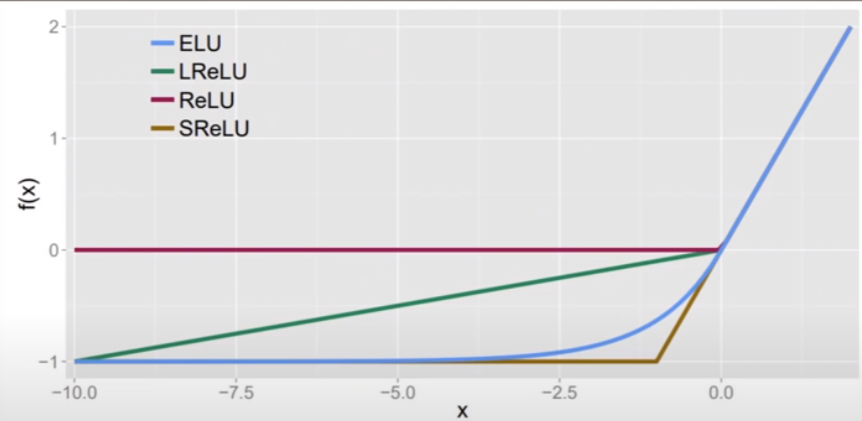{width=250px}